# Load dataset

https://www.kaggle.com/adityakadiwal/water-potability

In [1]:
import pandas as pd

water_quality = pd.read_csv("datasets/water_quality/water_potability.csv")

In [2]:
water_quality

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Checking for NA's

In [3]:
water_quality["Sulfate"].isna().sum()

781

In [4]:
water_quality.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
water_quality.dropna().count()

ph                 2011
Hardness           2011
Solids             2011
Chloramines        2011
Sulfate            2011
Conductivity       2011
Organic_carbon     2011
Trihalomethanes    2011
Turbidity          2011
Potability         2011
dtype: int64

### Multiple imputation using MICE

In [6]:
# tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.1 which is incompatible.
# fancyimpute 0.6.0 requires numpy==1.19.5, but you have numpy 1.21.1 which is incompatible.

In [7]:
from fancyimpute import IterativeImputer as MICE
trans = MICE(verbose=False)
fitted = trans.fit(water_quality)
trans = fitted.transform(water_quality)

In [8]:
water_quality_MICE = pd.DataFrame(trans)
water_quality_MICE

,0,1,2,3,4,5,6,7,8,9
0,7.190793,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,344.837035,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,331.983224,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,338.609814,392.449580,19.903225,66.474992,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,326.847002,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.992285,402.883113,11.168946,77.488213,4.708658,1.0


In [9]:
water_quality.loc[water_quality.isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [10]:
water_quality_MICE.loc[water_quality_MICE.isna().any(axis = 1)]

,0,1,2,3,4,5,6,7,8,9


In [11]:
water_quality[water_quality.isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [12]:
water_quality_MICE.columns = water_quality.columns
water_quality_MICE

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.190793,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,344.837035,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,331.983224,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,338.609814,392.449580,19.903225,66.474992,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,326.847002,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.992285,402.883113,11.168946,77.488213,4.708658,1.0


## Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

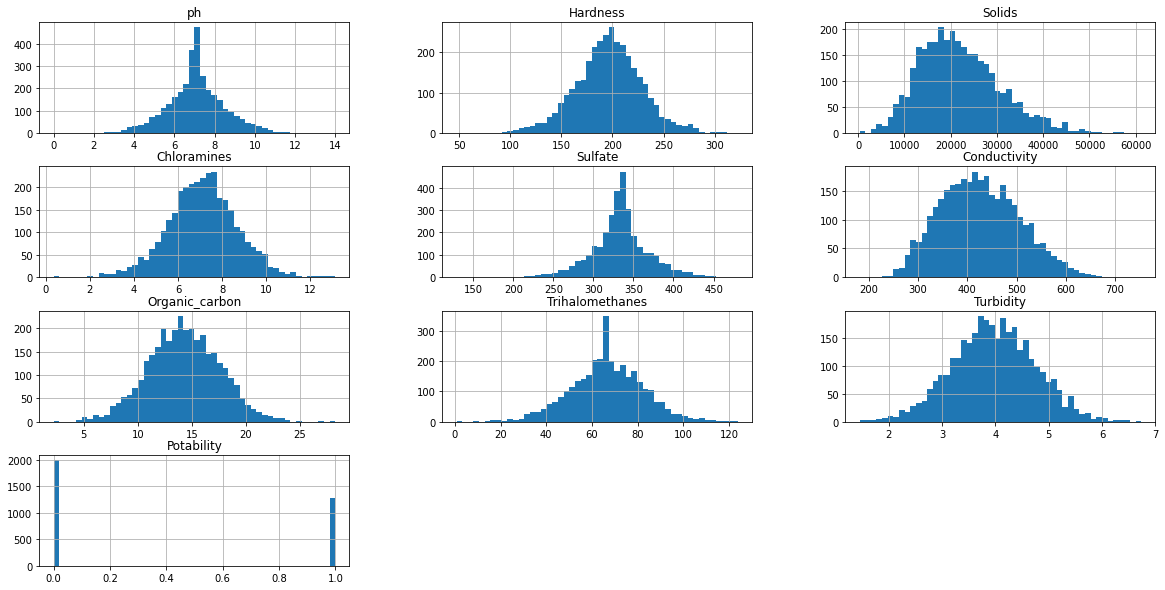

In [13]:
import matplotlib.pyplot as plt
water_quality_MICE.hist(bins = 50, figsize = (20, 10))
plt.show

Overall the data looks quite normally distributed. Solids may be slightly left skewed but still relatively normally distributed. The distribution of potability indicated an unbalanced dataset which may bias the model. 

## Splitting datasets into test and train set

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_index, test_index in split.split(water_quality_MICE, water_quality_MICE["Potability"]):
    strat_train_set = water_quality_MICE.loc[train_index]
    strat_test_set = water_quality_MICE.loc[test_index]

In [15]:
strat_test_set["Potability"].value_counts()/len(strat_test_set)

0.0    0.609756
1.0    0.390244
Name: Potability, dtype: float64

In [16]:
strat_train_set["Potability"].value_counts()/len(strat_train_set)

0.0    0.609924
1.0    0.390076
Name: Potability, dtype: float64

In [17]:
water_quality_MICE["Potability"].value_counts()/len(water_quality_MICE)

0.0    0.60989
1.0    0.39011
Name: Potability, dtype: float64

## Correlation matrix

In [18]:
cor_mat = water_quality_MICE.corr()
cor_mat["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006930
Turbidity          0.001581
ph                -0.004295
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020482
Organic_carbon    -0.030001
Name: Potability, dtype: float64

## Data Prep for ML

In [76]:
# need to scale data. Create pipeline first

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer as MICE

# predictors
water_quality_prep = strat_train_set.drop("Potability", axis = 1)
# explanatory
water_quality_labels = strat_train_set["Potability"].values

# Create pipeline
pipeline = Pipeline([
    ("iterative_imputer", MICE()),
    ("std_scaler", StandardScaler())
])

# Fit and transform data through pipeline 
water_quality_tr = pipeline.fit_transform(water_quality_prep)
water_quality_tr = pd.DataFrame(water_quality_tr)
water_quality_tr


,0,1,2,3,4,5,6,7,8
0,-0.731446,0.845544,-1.946291,0.207917,0.060310,-1.247951,-0.984449,-1.900356,0.048685
1,-0.824294,-0.356787,-0.884714,1.621522,-0.010543,-0.200348,0.123746,-0.132361,-0.300898
2,0.677203,-0.917775,-0.449130,-0.161394,0.175053,2.192572,0.597908,-0.678302,0.124052
3,-0.461868,-0.403356,-0.174623,0.838321,0.894034,1.540158,-0.267450,0.176907,0.718257
4,-0.642688,1.196877,-1.603887,-0.550957,0.104558,-0.111463,-0.470784,2.525309,-0.919670
...,...,...,...,...,...,...,...,...,...
2615,-1.169239,1.245883,-0.664262,0.243097,-2.174620,-0.394698,-0.565211,-2.487427,-1.022904
2616,-0.004558,0.711914,0.209781,-0.594521,0.223080,-1.149199,-1.111015,1.525864,1.017987
2617,0.323430,1.877825,-2.209530,1.872189,1.633419,-0.882811,-0.131197,-0.153065,0.137589
2618,2.590184,-0.589204,0.419854,0.339043,-0.597614,-0.523614,0.950322,-1.489289,-0.437623


# Logistic Regression

Scores: [0.62700061 0.62700061 0.6239495  0.6239495  0.6239495  0.6239495
 0.6239495  0.6239495  0.6239495  0.6239495 ]
Means: 0.6245597220350174
Standard Deviation: 0.0012204463955648227


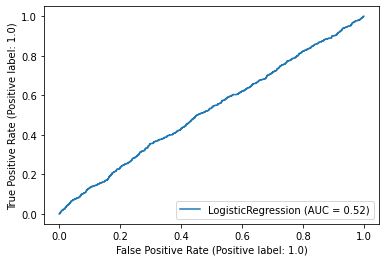

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

def display_scores(scores):
    print("Scores:", scores)
    print("Means:", scores.mean())
    print("Standard Deviation:", scores.std())

logistic_model = LogisticRegression(solver = "liblinear")
logistic_model.fit(water_quality_tr, water_quality_labels)
log_scores = cross_val_score(logistic_model, 
                             water_quality_tr, 
                             water_quality_labels,
                             scoring = "neg_mean_squared_error", cv = 10)
log_rmse_score = np.sqrt(-log_scores)
display_scores(log_rmse_score)
metrics.plot_roc_curve(logistic_model, water_quality_tr, water_quality_labels)

## Creating a confusion matrix

In [90]:
# Two methods for prediction output. 
log_pred_water_quality_prob = logistic_model.predict_proba(water_quality_tr)
log_pred_water_quality = logistic_model.predict(water_quality_tr)
probability_predictions = pd.DataFrame(log_pred_water_quality_prob)
probability_predictions["Final_pred"] = np.where(probability_predictions.loc[:,1] > 0.5, 1, 0)
probability_predictions.columns = ["not_portable", "pred_portability", "final_pred"]
probability_predictions.drop("not_portable", axis = 1, inplace = True)
probability_predictions

,pred_portability,final_pred
0,0.380690,0
1,0.390477,0
2,0.361397,0
3,0.383765,0
4,0.372184,0
...,...,...
2615,0.386284,0
2616,0.412578,0
2617,0.367281,0
2618,0.388210,0


In [104]:
# Joining all data back together. Need to set_index if 
# index are wrong the data does not get joined properly. NAN's coehersed

water_quality_tr.columns = water_quality_prep.columns
water_quality_final_table = pd.concat([water_quality_tr, 
                                       probability_predictions], axis = 1)
labels = pd.DataFrame(strat_train_set["Potability"]).astype(np.int64)
water_quality_final_table = water_quality_final_table.set_index(labels.index)
water_quality_final_table = pd.concat([water_quality_final_table, 
                                      labels], axis = 1)
water_quality_final_table

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred_portability,final_pred,Potability
3255,-0.731446,0.845544,-1.946291,0.207917,0.060310,-1.247951,-0.984449,-1.900356,0.048685,0.380690,0,1
2540,-0.824294,-0.356787,-0.884714,1.621522,-0.010543,-0.200348,0.123746,-0.132361,-0.300898,0.390477,0,0
899,0.677203,-0.917775,-0.449130,-0.161394,0.175053,2.192572,0.597908,-0.678302,0.124052,0.361397,0,0
1902,-0.461868,-0.403356,-0.174623,0.838321,0.894034,1.540158,-0.267450,0.176907,0.718257,0.383765,0,1
295,-0.642688,1.196877,-1.603887,-0.550957,0.104558,-0.111463,-0.470784,2.525309,-0.919670,0.372184,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,-1.169239,1.245883,-0.664262,0.243097,-2.174620,-0.394698,-0.565211,-2.487427,-1.022904,0.386284,0,0
96,-0.004558,0.711914,0.209781,-0.594521,0.223080,-1.149199,-1.111015,1.525864,1.017987,0.412578,0,0
1131,0.323430,1.877825,-2.209530,1.872189,1.633419,-0.882811,-0.131197,-0.153065,0.137589,0.367281,0,1
2943,2.590184,-0.589204,0.419854,0.339043,-0.597614,-0.523614,0.950322,-1.489289,-0.437623,0.388210,0,0


In [108]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(water_quality_final_table.loc[:,"Potability"], 
                                  water_quality_final_table.loc[:,"final_pred"]).ravel()
(tn, fp, fn, tp)

(1598, 0, 1022, 0)

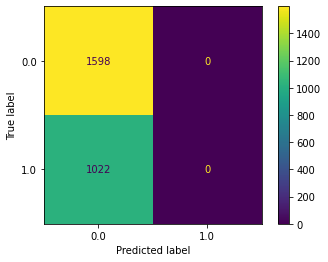

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(water_quality_final_table.loc[:,"Potability"], 
                                  water_quality_final_table.loc[:,"final_pred"])
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = logistic_model.classes_)
disp.plot()

In [98]:
water_quality_final_table.loc[:,"Potability"].astype(np.int64)

3255    1
2540    0
899     0
1902    1
295     1
       ..
1684    0
96      0
1131    1
2943    0
1205    1
Name: Potability, Length: 2620, dtype: int64

In [67]:
labels = pd.DataFrame(strat_train_set["Potability"])
labels = labels.set_index(water_quality_final_table.index)
labels

,Potability
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
2615,0.0
2616,0.0
2617,1.0
2618,0.0


In [57]:
water_quality_final_table["Potability"]

0       NaN
1       0.0
2       NaN
3       NaN
4       0.0
       ... 
2615    NaN
2616    0.0
2617    0.0
2618    0.0
2619    0.0
Name: Potability, Length: 2620, dtype: float64

In [ ]:
water_quality_tr["Potability"] = water_quality.loc[:, "Potability"]
#water_quality_tr.columns = water_quality.columns
water_quality_tr["predicted_potability"] = probability_predictions["Final_pred"]
water_quality_tr

In [ ]:
(tn, fp, fn, tp)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(water_quality_tr.loc[:,"Potability"], water_quality_tr.loc[:,"predicted_potability"])
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = logistic_model.classes_)
disp.plot()